In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [7]:
resumeDataSet = pd.read_excel(r'C:\Users\Puspkant Kumar\Desktop\dtm oo2\dataextractedscience.xlsx')
resumeDataSet['cleaned_resume'] = ''
resumeDataSet.head()


,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details _x000D_\nMay 2013 to May 201...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills Ã¢Â€Â¢ R Ã¢Â€Â¢ Python Ã¢Â€Â¢ SAP HANA ...,
4,Data Science,"Education Details _x000D_\n MCA YMCAUST, Fa...",


In [8]:
resumeDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        40 non-null     object
 1   Resume          40 non-null     object
 2   cleaned_resume  40 non-null     object
dtypes: object(3)
memory usage: 1.1+ KB


In [9]:
print ("Displaying the distinct categories of resume:\n\n ")
print (resumeDataSet['Category'].unique())

Displaying the distinct categories of resume:

 
['Data Science']


In [ ]:
#as you can see we have reduce the 24 categories to only one category i.e data science


In [10]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category:\n\n")
print (resumeDataSet['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category:


Data Science    40
Name: Category, dtype: int64


In [ ]:
#now we will clean the resume using the regular expression property in python

In [18]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    # remove numbers
    resumeText = re.sub(r'\d+', '',resumeText)
    
    return resumeText
    
resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))

In [19]:
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details _x000D_\nMay 2013 to May 201...,Education Details xD May to May B E UIT RGPV...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills Ã¢Â€Â¢ R Ã¢Â€Â¢ Python Ã¢Â€Â¢ SAP HANA ...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details _x000D_\n MCA YMCAUST, Fa...",Education Details xD MCA YMCAUST Faridabad Har...


In [20]:
resumeDataSet_d=resumeDataSet.copy()

In [21]:
#including nltk library to use stop words to clean the resume more further
#importing wordcloud to visualize the data

In [22]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resumeDataSet['Resume'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = cleanResume(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('xD', 1764), ('Exprience', 248), ('months', 240), ('Data', 200), ('data', 172), ('Python', 168), ('year', 168), ('Less', 156), ('Science', 128), ('Details', 120), ('Learning', 116), ('Machine', 112), ('using', 96), ('like', 88), ('learning', 84), ('The', 84), ('company', 76), ('description', 72), ('SAP', 68), ('Deep', 64), ('SQL', 64), ('Analytics', 60), ('analytics', 56), ('project', 56), ('Education', 52), ('text', 52), ('HANA', 52), ('NLP', 52), ('Neural', 48), ('analysis', 48), ('Engineering', 48), ('I', 48), ('Industry', 48), ('models', 44), ('Technical', 44), ('January', 44), ('Skill', 40), ('monthsCompany', 40), ('This', 40), ('various', 40), ('machine', 40), ('Consultant', 40), ('knowledge', 40), ('Wipro', 40), ('Analysis', 36), ('Tableau', 36), ('reports', 36), ('development', 36), ('information', 36), ('A', 36)]


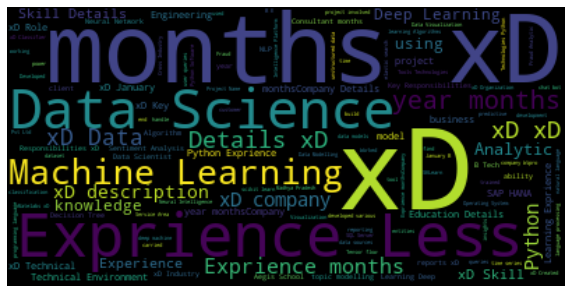

In [23]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
#"xD" is just a garbage value , i am trying to remove it

In [26]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])

In [27]:
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,0,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,0,Education Details _x000D_\nMay 2013 to May 201...,Education Details xD May to May B E UIT RGPV...
2,0,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,0,Skills Ã¢Â€Â¢ R Ã¢Â€Â¢ Python Ã¢Â€Â¢ SAP HANA ...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,0,"Education Details _x000D_\n MCA YMCAUST, Fa...",Education Details xD MCA YMCAUST Faridabad Har...


In [28]:
resumeDataSet.Category.value_counts()

0    40
Name: Category, dtype: int64

In [29]:

resumeDataSet_d.Category.value_counts() #understanding decode LabelEncoder

Data Science    40
Name: Category, dtype: int64

In [30]:
del resumeDataSet_d #clearing the space occupied 

In [31]:
#vectorizing the data -1
#cleaned resume -2
#now comparing 1 and 2 and checking accuracy using KNN

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.2,
                                                 shuffle=True, stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(32, 1122)
(8, 1122)


In [33]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 1.00
Accuracy of KNeighbors Classifier on test set:     1.00


In [34]:
#the acuuracy is 100 because the data set is small and we have cleaned the resume

In [35]:
#thanks